# ML Pipeline

## Step 1: Collect data

In [18]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *

from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.naive_bayes import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.discriminant_analysis import *

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import *
from sklearn.tree import DecisionTreeRegressor


In [19]:
# read the data
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

## Step 2: Prepare the data

Remove duplicates

In [20]:
# remove lines that have all values duplicated
red_wine.drop_duplicates(inplace=True, ignore_index=True)
white_wine.drop_duplicates(inplace=True, ignore_index=True)

Add missing information and combine data

In [21]:
# create a df with all wines

# add color of wine as parameter
red_wine['color'] = 'red'
white_wine['color'] = 'white'

# combine the wine dfs
wine = pd.concat([red_wine, white_wine], ignore_index=True)

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
wine['color'] = pd.Categorical(wine['color'],
categories=['red', 'white'])

Adjust feature names

In [22]:
# use the rename method to change all columns names lowercase and add an underscore if they are made of 2 words
for wine_df in [wine, red_wine, white_wine]:
    wine_df.rename(str.lower, axis='columns', inplace=True)  # make the names lowercase
    wine_df.columns = wine_df.columns.str.replace(' ', '_')     # replace space with underscore in column names

Prepare wine data for model training

In [23]:
# prepare wine data for model training
def prepare_wine_data_for_model_training(wine_df):

    wine_ml = wine_df

    # drop color column if there is only one column
    if len(wine_ml['color'].unique()) < 2:
        wine_ml = wine_ml.drop(['color'], axis=1)
    
    # one hot encode if there is multiple colors
    else:
        # create an instance of OneHotEncoder
        oh_enc = OneHotEncoder(categories=[['red','white']])

        # fit and transform the 'color' column
        encoded_color = oh_enc.fit_transform(wine_ml[['color']])

        # convert the one-hot encoded data to a DataFrame
        encoded_color_df = pd.DataFrame(encoded_color.toarray(), columns=oh_enc.get_feature_names_out(['color']))

        # concatenate the one-hot encoded DataFrame with 'wine_ml'
        wine_ml = pd.concat([wine_ml, encoded_color_df], axis=1)

        # drop the original 'color' column from 'wine_ml'
        wine_ml = wine_ml.drop('color', axis=1)
    
    return wine_ml

In [24]:
red_wine_ml = prepare_wine_data_for_model_training(red_wine)
white_wine_ml = prepare_wine_data_for_model_training(white_wine)
wine_ml = prepare_wine_data_for_model_training(wine)

In [25]:
wine_ml

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0,0.0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0,1.0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0,1.0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0,1.0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0,1.0


In [26]:
white_wine_ml

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3956,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
3957,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
3958,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
3959,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [27]:
X = white_wine_ml.drop(['quality'], axis=1) # features
y = white_wine_ml['quality']  # target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# initialize the model
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train.ravel())

# make predictions on the test set
y_pred = forest.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.5322
Confusion Matrix:
 [[  0   1   2   3   0   0   0]
 [  1   4  16   6   0   0   0]
 [  0  10 163  67   4   1   0]
 [  0   4 104 219  24   0   0]
 [  0   1   8  93  36   3   0]
 [  0   0   0  15   7   0   0]
 [  0   0   0   0   1   0   0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.20      0.15      0.17        27
           5       0.56      0.67      0.61       245
           6       0.54      0.62      0.58       351
           7       0.50      0.26      0.34       141
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00         1

    accuracy                           0.53       793
   macro avg       0.26      0.24      0.24       793
weighted avg       0.51      0.53      0.51       793



/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [28]:
white_wine_ml['quality'].value_counts(normalize=True)

quality
6    0.451401
5    0.296642
7    0.173946
4    0.038627
8    0.033072
3    0.005049
9    0.001262
Name: proportion, dtype: float64

In [29]:
# TODO's:
# include feature scaling
# include feature importance


Feature: fixed_acidity, Score: 0.05847
Feature: volatile_acidity, Score: 0.10271
Feature: citric_acid, Score: 0.05797
Feature: residual_sugar, Score: 0.06915
Feature: chlorides, Score: 0.07338
Feature: free_sulfur_dioxide, Score: 0.10505
Feature: total_sulfur_dioxide, Score: 0.07920
Feature: density, Score: 0.06223
Feature: ph, Score: 0.06542
Feature: sulphates, Score: 0.06893
Feature: alcohol, Score: 0.25673
Feature: color_red, Score: 0.00076
Feature: color_white, Score: 0.00000


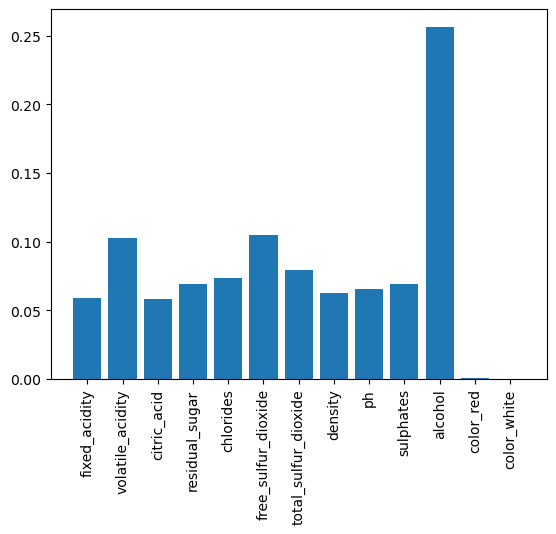

In [30]:
# decision tree for feature importance on a regression problem
# define dataset
X = wine_ml.drop(['quality'], axis=1) # features
y = wine_ml['quality']  # target variable

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# Get feature names
feature_names = X.columns

# Summarize feature importance
for feature, score in zip(feature_names, importance):
    print('Feature: %s, Score: %.5f' % (feature, score))

# Plot feature importance
plt.bar(feature_names, importance)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [31]:
# decision tree for feature importance on a regression problem
# define dataset
X = red_wine_ml.drop(['quality_label'], axis=1) # features
y = red_wine_ml['quality_label']  # target variable

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_
importance_red = importance

# Get feature names
feature_names = X.columns

# Summarize feature importance
for feature, score in zip(feature_names, importance):
    print('Feature: %s, Score: %.5f' % (feature, score))

# Plot feature importance
plt.bar(feature_names, importance)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

KeyError: "['quality_label'] not found in axis"

Feature: fixed_acidity, Score: 0.06081
Feature: volatile_acidity, Score: 0.11719
Feature: citric_acid, Score: 0.06229
Feature: residual_sugar, Score: 0.06367
Feature: chlorides, Score: 0.06714
Feature: free_sulfur_dioxide, Score: 0.10834
Feature: total_sulfur_dioxide, Score: 0.07638
Feature: density, Score: 0.06874
Feature: ph, Score: 0.07355
Feature: sulphates, Score: 0.07295
Feature: alcohol, Score: 0.22893


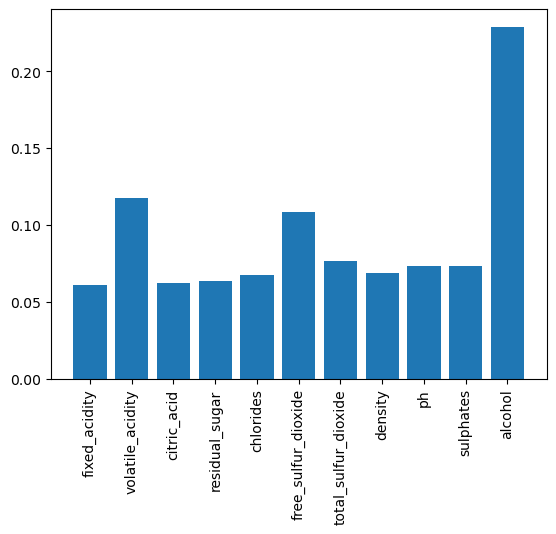

In [ ]:
# decision tree for feature importance on a regression problem
# define dataset
X = white_wine_ml.drop(['quality_label'], axis=1) # features
y = white_wine_ml['quality_label']  # target variable

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_
importance_white = importance

# Get feature names
feature_names = X.columns

# Summarize feature importance
for feature, score in zip(feature_names, importance):
    print('Feature: %s, Score: %.5f' % (feature, score))

# Plot feature importance
plt.bar(feature_names, importance)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()